In [ ]:
#@title
"""import json
from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.set_image_data_format('channels_first')
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results"""

"import json\nfrom keras.utils.data_utils import get_file\nfrom keras import backend as K\n\nCLASS_INDEX = None\nCLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'\n\n\ndef preprocess_input(x, dim_ordering='default'):\n    if dim_ordering == 'default':\n        dim_ordering = K.set_image_data_format('channels_first')\n    assert dim_ordering in {'tf', 'th'}\n\n    if dim_ordering == 'th':\n        x[:, 0, :, :] -= 103.939\n        x[:, 1, :, :] -= 116.779\n        x[:, 2, :, :] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, ::-1, :, :]\n    else:\n        x[:, :, :, 0] -= 103.939\n        x[:, :, :, 1] -= 116.779\n        x[:, :, :, 2] -= 123.68\n        # 'RGB'->'BGR'\n        x = x[:, :, :, ::-1]\n    return x\n\n\ndef decode_predictions(preds, top=5):\n    global CLASS_INDEX\n    if len(preds.shape) != 2 or preds.shape[1] != 1000:\n        raise ValueError('`decode_predictions` expects '\n                         'a batch o

## Import Packages

In [1]:
import skimage
import cv2
import os
import numpy as np
from sklearn import manifold, datasets
import pickle as pkl

import keras
from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
#import imagenet_utils as imu
from keras.applications import imagenet_utils as imu

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [2]:
import cv2 as cv
from glob import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [3]:
PATH = '/content/drive/My Drive/images/' #@param{type:'string'}

#images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]
#print(len(images))

In [4]:
#@title
"""rootfolder = PATH
file_list = os.listdir(rootfolder)
print(file_list)"""

'rootfolder = PATH\nfile_list = os.listdir(rootfolder)\nprint(file_list)'

In [5]:
#@title
"""file_list_sorted = file_list.sort()
print(file_list_sorted)"""

'file_list_sorted = file_list.sort()\nprint(file_list_sorted)'

In [6]:
#@title
"""
#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'
file_list = []
for i in range(len(os.listdir(rootfolder))):
  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))

print(file_list)"""

"\n#rootfolder = 'D:\\COMPUTER_VISION\\AAPR\\10000_imgs_aa_barrel_vault'\nfile_list = []\nfor i in range(len(os.listdir(rootfolder))):\n  file_list.append(plt.imread(PATH + str(i+10000) + '.jpg'))\n\nprint(file_list)"

In [7]:
#np.array(file_list)

### Preview

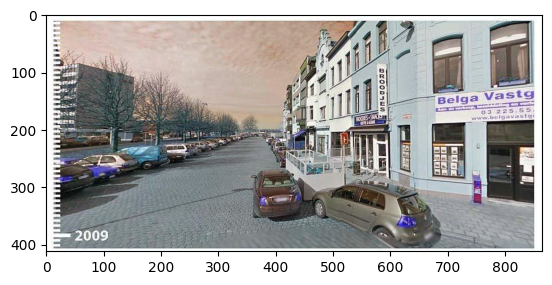

In [8]:
# Initialise the image stack with the first image
img = cv.imread(PATH + '0.jpg') # Mind the naming pattern
#print(img)
plt.imshow(img)

## PCA (principal component analysis)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
import imageio
from skimage import io,transform,color
from skimage import img_as_ubyte
#from sklearn.datasets.base import load_iris
from PIL import Image
import cv2 as cv

In [10]:
num_imgs = 82 #@param{type:'integer'}

In [11]:
# Initialise im_stack as an empty list
im_stack = []

In [16]:
import cv2 as cv
import numpy as np
from skimage import color
import sklearn.decomposition as dp


num_imgs = 81  # Example value, replace with the actual number of images

# Initialize an empty list to store the image stack
im_stack = []

for i in range(1, num_imgs + 1):
    img = cv.imread(PATH + str(i) + '.jpg')
    if img is not None:
        img_gray = color.rgb2gray(img)

        # Set the new width and height for the resized image
        new_width = 64
        new_height = 32

        # Resize the image
        img_gray = cv.resize(img_gray, (new_width, new_height), interpolation=cv.INTER_AREA)

        # Flatten the image
        img_flat = img_gray.flatten()

        # Append the flattened image to the stack
        im_stack.append(img_flat)

        # Debugging print statements
        print(f"Image {i} shape before resizing: {img_gray.shape}")
        print(f"Image {i} shape after resizing: {img_gray.shape}")
        print(f"Image {i} flattened shape: {img_flat.shape}")

# Convert the list of flattened images to a numpy array
im_stack = np.array(im_stack)

# Verify the shape of the image stack
assert im_stack.shape == (num_imgs, new_width * new_height), \
    "The shape of the image stack does not match the expected dimensions."

# Function to perform PCA on the image stack
def PCA(matrix, num_components=3):
    pca = dp.PCA(n_components=num_components)
    pca_features = pca.fit_transform(matrix)
    return pca_features

# Apply PCA to the image stack
low_matrix = PCA(im_stack)

# Display the PCA features for each image
for i, features in enumerate(low_matrix):
    print(f"Image {i+1} PCA features: {features}")




Image 1 shape before resizing: (32, 64)
Image 1 shape after resizing: (32, 64)
Image 1 flattened shape: (2048,)
Image 2 shape before resizing: (32, 64)
Image 2 shape after resizing: (32, 64)
Image 2 flattened shape: (2048,)
Image 3 shape before resizing: (32, 64)
Image 3 shape after resizing: (32, 64)
Image 3 flattened shape: (2048,)
Image 4 shape before resizing: (32, 64)
Image 4 shape after resizing: (32, 64)
Image 4 flattened shape: (2048,)
Image 5 shape before resizing: (32, 64)
Image 5 shape after resizing: (32, 64)
Image 5 flattened shape: (2048,)
Image 6 shape before resizing: (32, 64)
Image 6 shape after resizing: (32, 64)
Image 6 flattened shape: (2048,)
Image 7 shape before resizing: (32, 64)
Image 7 shape after resizing: (32, 64)
Image 7 flattened shape: (2048,)
Image 8 shape before resizing: (32, 64)
Image 8 shape after resizing: (32, 64)
Image 8 flattened shape: (2048,)
Image 9 shape before resizing: (32, 64)
Image 9 shape after resizing: (32, 64)
Image 9 flattened shape: 

In [17]:
def PCA(matrix, num_components=3):
    # Load the PCA algorithm, set the principal component after dimensionality reduction to num_components
    pca = dp.PCA(n_components=num_components)
    # Dimensionality reduction on raw data
    pca_features = pca.fit_transform(matrix)

    # Print the first two PCA features for brevity
    print(pca_features[0])
    print(pca_features[1])

    # Print PCA features for each image
    for i in range(num_imgs):
        print(f"Image {i+1} PCA features: {pca_features[i]}")

    return pca_features

# Apply PCA to the image stack
low_matrix = PCA(im_stack)


[ 8.40286271  2.14858062 -1.1049924 ]
[-6.36911796  1.82530974 -0.56570991]
Image 1 PCA features: [ 8.40286271  2.14858062 -1.1049924 ]
Image 2 PCA features: [-6.36911796  1.82530974 -0.56570991]
Image 3 PCA features: [-3.45576838  3.14333071 -2.17230155]
Image 4 PCA features: [ 2.22153151 -4.52240591  0.08868116]
Image 5 PCA features: [-1.69380422 -0.22488397  2.39992464]
Image 6 PCA features: [ 5.08497603 -0.87692583  0.42100615]
Image 7 PCA features: [-0.65538499  1.12104579  0.52168919]
Image 8 PCA features: [-0.71139548  2.14148282  0.96295146]
Image 9 PCA features: [-1.0308977  -2.33015928  0.04027101]
Image 10 PCA features: [1.66267811 1.96261536 2.72482927]
Image 11 PCA features: [ 1.56549531  0.22524685 -3.78455309]
Image 12 PCA features: [1.11215272 3.77831318 2.29631679]
Image 13 PCA features: [0.07437844 0.01247392 0.27286083]
Image 14 PCA features: [ 3.85367486 -0.9582939  -3.55124202]
Image 15 PCA features: [-0.47657987  2.45042773  0.79823831]
Image 16 PCA features: [-1.

## T-SNE (t-distributed stochastic neighbor embedding)

In [18]:
import pickle as pkl
import numpy as np
import os
from sklearn import manifold, datasets
import time

_n_dim = 3
_perplexity = 10
_learning_rate = 100
_scale = 1

tsne = manifold.TSNE(n_components=_n_dim, init='pca', random_state=0, perplexity=int(_perplexity), learning_rate=int(_learning_rate))
X_tsne = tsne.fit_transform(low_matrix) # Fit X into an embedded space and return that transformed output.
X_tsne  = X_tsne *_scale
output = X_tsne.tolist()
time=time.time()

for i in range(num_imgs):
    print(output[i])


[68.50251007080078, 98.42326354980469, -62.43203353881836]
[-42.127479553222656, 42.93678665161133, -87.23259735107422]
[-2.692418098449707, 94.32662200927734, 10.688958168029785]
[-19.316930770874023, 29.450654983520508, 11.467473030090332]
[16.45883560180664, 68.58649444580078, 109.91881561279297]
[30.321260452270508, 61.90882873535156, -43.03995132446289]
[-98.79435729980469, 4.892669677734375, -5.526910781860352]
[-99.58545684814453, 3.694512128829956, -48.273033142089844]
[-27.140993118286133, -37.35817337036133, -28.461097717285156]
[49.98611831665039, -40.507972717285156, -65.21610260009766]
[-71.90030670166016, 52.126708984375, 74.83783721923828]
[53.42276382446289, -37.574344635009766, -104.65100860595703]
[29.58940315246582, -94.68756103515625, -4.965761184692383]
[-40.18563461303711, 59.59758758544922, 100.72924041748047]
[-70.37395477294922, 22.786174774169922, -50.88627243041992]
[-85.44776153564453, -45.724517822265625, -38.30678176879883]
[58.496456146240234, 63.22676849

### Simple Visualisation

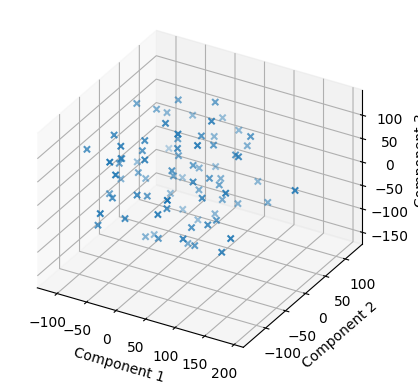

In [19]:
# Plotting the results in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective (orthographic projection)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker = 'x')
ax.set_proj_type('ortho')  # Setting orthographic projection

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()


[0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387 0.00078387
 0.00078387 0.00078387 0.00078387]


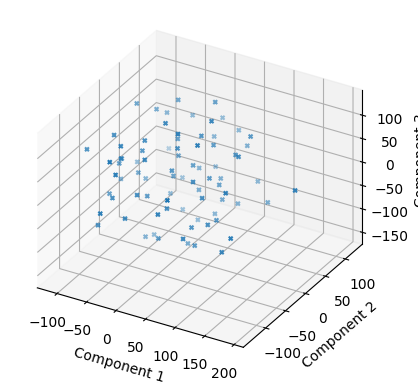

In [20]:
from sklearn.neighbors import KernelDensity
from mpl_toolkits.mplot3d import Axes3D

# Compute kernel density estimates for each point in the t-SNE data
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(X_tsne)
densities = kde.score_samples(X_tsne)  # Log density
densities = np.exp(densities)  # Convert log density to actual density
print(densities)

# Scale densities for marker sizes in the plot
density_scale = 10**4  # Scale factor for better visualisation
marker_sizes = densities * density_scale

# Creating the 3D scatter plot with marker sizes based on local kernel density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot without perspective, marker sizes based on density
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], marker='x', s=marker_sizes)

# Setting orthographic projection
ax.set_proj_type('ortho')

# Labeling axes
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Show the plot
plt.show()

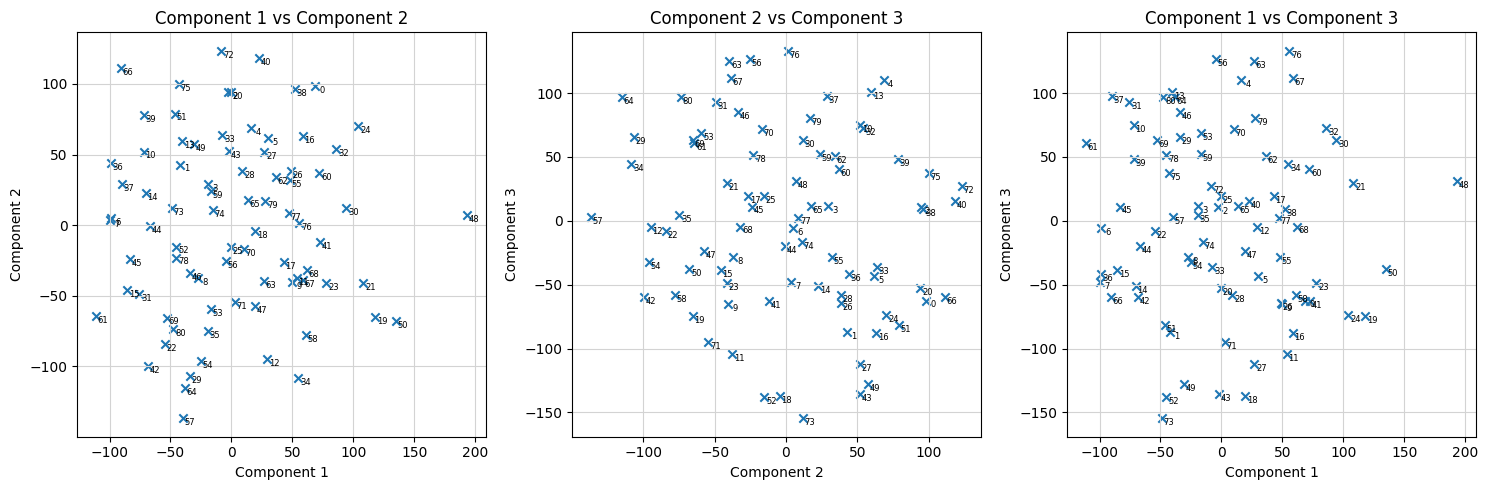

In [21]:
# Adjusting the annotation font size and adding gridlines to the scatter plots

# Re-creating the subplots with smaller font size for annotations and added gridlines
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with smaller font and gridlines
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    ax.scatter(x_data, y_data, marker = 'x')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color = 'lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size

# Component 1 vs Component 2 with annotations
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with annotations
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with annotations
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


[ 9.37652362 21.75307078 16.32881051 24.65954533 22.27451697 22.90266888
 13.70224338 13.47152452 22.85497912 22.86426373 16.40826263 22.96476093
  9.96014609 20.53466587 18.99019971 14.30228349 18.29458786 25.30292732
 26.71199569  7.57467638 16.40342852  9.91324373 17.24689324 17.28755994
  7.31336569 25.20259581 24.05599153 25.13228082 26.84765814 14.60948261
 11.52696296 16.27373419 12.83050838 23.02780721  6.40076591 18.98141854
 11.46145186 15.2525046  11.91277131 12.50784328  9.63402118 19.58147073
 12.07797646 25.05511822 19.55792158 15.98366919 22.56368833 19.85026899
  2.24786504 21.91902928  5.68874546 16.41002821 21.74761267 21.05510645
 15.96947299 24.70564367 24.48468594  7.76699107 11.97771381 24.85632159
 18.00160761  6.96338078 26.32540337 23.8015132  12.87919352 27.23984462
  4.93791077 21.99339321 22.19152141 19.35944996 25.74796337 20.94769809
  8.92967125 21.47193985 24.67901574 11.98458945 23.74801762 25.32529484
 21.71136563 27.32747085 19.3268659 ]
[12.42596178 

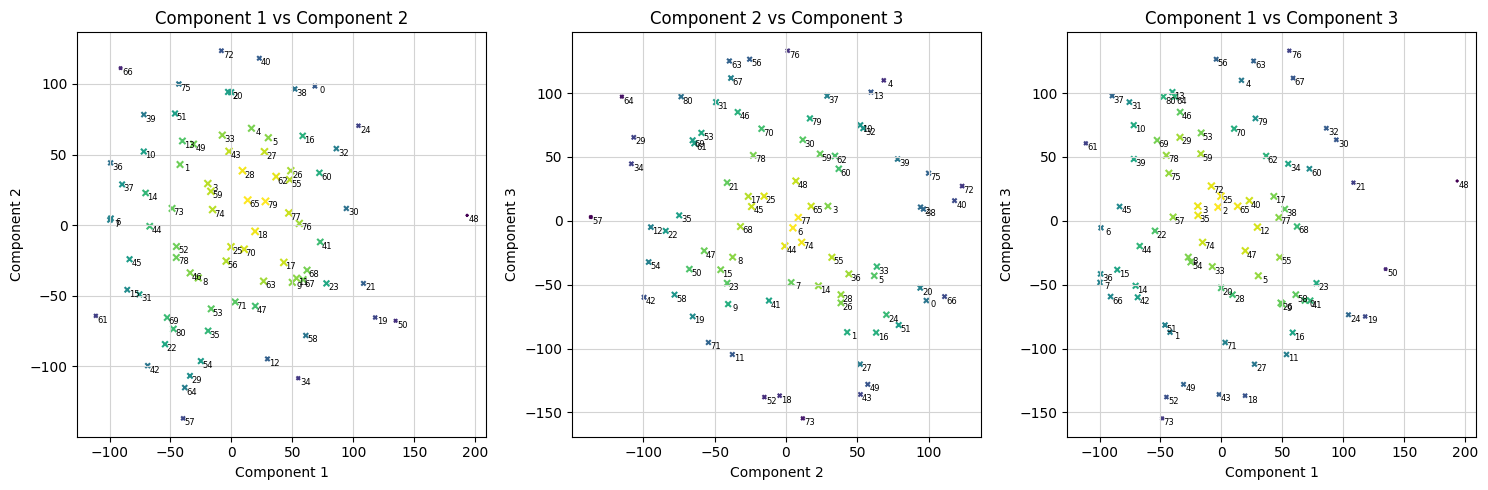

In [22]:
from scipy.stats import gaussian_kde

# Re-creating the subplots with density-based marker sizes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a function for plotting and annotating with density-based marker sizes
def plot_and_annotate(ax, x_data, y_data, title, xlabel, ylabel):
    # Calculating the point density
    xy = np.vstack([x_data, y_data])
    scale = 10**6
    z = gaussian_kde(xy)(xy)*scale

    # Scatter plot with density-based marker sizes
    ax.scatter(x_data, y_data, s=z, marker='x', c=z)  # Scaling marker size by density
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True, color='lightgrey')  # Adding gridlines
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        ax.annotate(i, (x, y), textcoords="offset points", xytext=(5,-5), ha='center', fontsize=6)  # Smaller font size
    print(z)

# Component 1 vs Component 2 with density-based marker sizes
plot_and_annotate(axs[0], X_tsne[:, 0], X_tsne[:, 1], 'Component 1 vs Component 2', 'Component 1', 'Component 2')

# Component 2 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[1], X_tsne[:, 1], X_tsne[:, 2], 'Component 2 vs Component 3', 'Component 2', 'Component 3')

# Component 1 vs Component 3 with density-based marker sizes
plot_and_annotate(axs[2], X_tsne[:, 0], X_tsne[:, 2], 'Component 1 vs Component 3', 'Component 1', 'Component 3')

# Display the annotated plots
plt.tight_layout()
plt.show()


## Save CSV

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Convert the list to an array
my_array = np.array(output)

# Save the array as a CSV file
f_name = 'Latent_codes_may' #@param{type:'string'}
np.savetxt(f_name + '.csv', my_array, delimiter=',')

## Save Model

In [25]:
"""
from pathlib import Path
features = np.stack(low_matrix, axis=0)

# rootfolder2 = Path + '_features'
rootfolder2 = '/content/drive/My Drive/'
fileName = os.path.join(rootfolder2,'pca_pool')
fileObject = open(fileName, 'wb')
pkl.dump(features, fileObject)
fileObject.close()
"""

"\nfrom pathlib import Path\nfeatures = np.stack(low_matrix, axis=0)\n\n# rootfolder2 = Path + '_features'\nrootfolder2 = '/content/drive/My Drive/'\nfileName = os.path.join(rootfolder2,'pca_pool')\nfileObject = open(fileName, 'wb')\npkl.dump(features, fileObject)\nfileObject.close()\n"